Labels: [0. 1. 2. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 2. 2. 2. 1. 2. 2. 2. 1. 2. 1. 1. 2. 1. 2. 2. 2. 2. 1. 1. 1. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 1. 1. 1. 2.
 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]
Centroids: [[-0.60641634  1.90690616 -1.27526947 -1.21201901]
 [-0.79163009 -0.99905397 -0.42703853 -0.47299832]
 [ 0.34628915  0.01999508  0.3373053   0.34082086]]


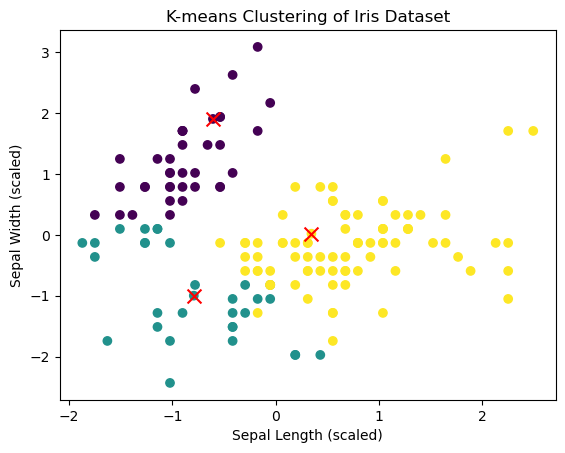

The accuracy is:  0.68


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


def kmeans(X,K):
    centroids=X[:K]
    pointsPerCentroid=[[] for _ in range(K)]
    
    for i in range(K,len(X)):
        distances=np.linalg.norm(X[i]-centroids,axis=1)
        nearest_centroid=np.argmin(distances)
        pointsPerCentroid[nearest_centroid].append(X[i])
        centroids[nearest_centroid]=np.mean(pointsPerCentroid[nearest_centroid],axis=0)
        
    labels=np.zeros(X.shape[0])
   
    
    for i in range(len(X)):
        distances=np.linalg.norm(X[i]-centroids,axis=1)
        nearest_centroid=np.argmin(distances)
        labels[i]=nearest_centroid
    
    return labels,centroids


X=load_iris().data
y=load_iris().target
K=3

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

labels,centroids=kmeans(X_scaled,K)
print("Labels:",labels)
print("Centroids:",centroids)


plt.scatter(X_scaled[:,0],X_scaled[:,1],c=labels)
plt.scatter(centroids[:,0],centroids[:,1],marker="x",color='red',s=100)
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('K-means Clustering of Iris Dataset')
plt.show()



print("The accuracy is: ", accuracy_score(labels,y))



        